In [1]:
import numpy as np
import pandas as pd

## Gradient Descent

In [2]:
# learning rate
lr = 0.1
# initial point
X = -2 

In [9]:
def gradient_descent(X, lr, num_iteration):
    for i in range(num_iteration):
        X = X - lr*(2*X)
    return X
    

### Run Gradient Descent For Four Iterations

In [12]:
# Call gradient Function
gradient_descent(X, lr, 4)

-0.8192

# TASK 2

In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [2]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")    
    boston  = datasets.load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

#### Create Linear Regression Class 
    * Define Mean square error
        * Define the Fit Method , Trains the weight and the bias after every iterations to produce the best possible weight ny computing yne losses
        * Predict mX+b (linear ploting) wieght multply by input + bias to give predicted data

In [3]:
class LinearRegression:
    '''
    A class which implements linear regression model with gradient descent.
    '''
    def __init__(self, learning_rate=0.01, n_iterations=10000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights, self.bias = None, None
        self.loss = []
        
    
    def _mean_squared_error(self, y, y_hat):
        '''
        Private method, used to evaluate loss at each iteration.
        
        :param: y - array, true values
        :param: y_hat - array, predicted values
        :return: float
        '''
        error = 0
        for i in range(len(y)):
            error += (y[i] - y_hat[i]) ** 2
            # print(error)
        return error / len(y)
    
    def fit(self, X, y):
        '''
        Used to calculate the coefficient of the linear regression model.
        
        :param X: array, features
        :param y: array, true values
        :return: None
        '''
        # 1. Initialize weights and bias to zeros
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        # 2. Perform gradient descent
        for i in range(self.n_iterations):
            # Line equation
            y_hat = np.dot(X, self.weights) + self.bias
            loss = self._mean_squared_error(y, y_hat)
            self.loss.append(loss)
            
            # Calculate derivatives
            partial_w = (1 / X.shape[0]) * (2 * np.dot(X.T, (y_hat - y)))
            partial_d = (1 / X.shape[0]) * (2 * np.sum(y_hat - y))
            
            # Update the coefficients
            self.weights -= self.learning_rate * partial_w
            self.bias -= self.learning_rate * partial_d
        
        
    def predict(self, X):
        '''
        Makes predictions using the line equation.
        
        :param X: array, features
        :return: array, predictions
        '''
        return np.dot(X, self.weights) + self.bias

### Load Data into target and indepandent variables , y and x

In [4]:
X = boston.data
y = boston.target

### Normalize and split data into test and training 

In [5]:
from sklearn.model_selection import train_test_split
X = normalize(X, norm='l2')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



### Compute Error After 100 iterations

In [6]:
model = LinearRegression(n_iterations=100)
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [7]:
model._mean_squared_error(y_test,preds)

68.35725526670882

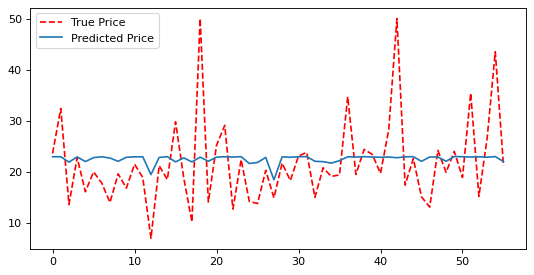

In [8]:
plt.figure(figsize=(8, 4), dpi=80)
plt.plot(y_test[:56], 'r--', preds[:56])
plt.legend(['True Price', 'Predicted Price'], loc='upper left')
plt.show()

### Compute Error After 1000 iterations 

In [9]:
model = LinearRegression(n_iterations=1000)
model.fit(X_train, y_train)
preds = model.predict(X_test)
model._mean_squared_error(y_test,preds)

56.421761385278785

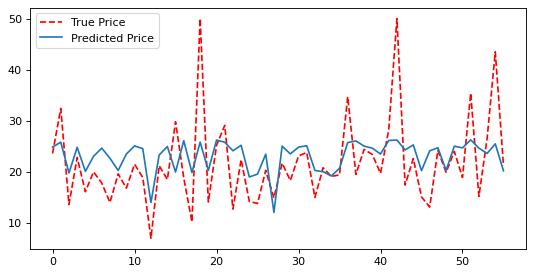

In [10]:
plt.figure(figsize=(8, 4), dpi=80)
plt.plot(y_test[:56], 'r--', preds[:56])
plt.legend(['True Price', 'Predicted Price'], loc='upper left')
plt.show()

### Error After 10000 iterations

In [11]:
model = LinearRegression(n_iterations=1000)
model.fit(X_train, y_train)
preds = model.predict(X_test)
model._mean_squared_error(y_test,preds)

56.421761385278785

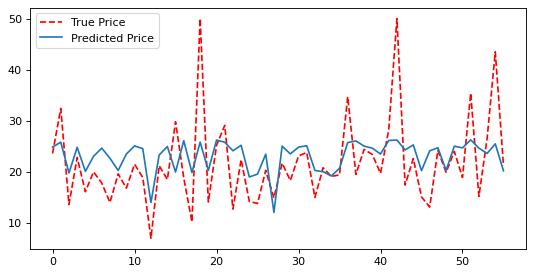

In [12]:
plt.figure(figsize=(8, 4), dpi=80)
plt.plot(y_test[:56], 'r--', preds[:56])
plt.legend(['True Price', 'Predicted Price'], loc='upper left')
plt.show()

### Error After 4000 iterations 

In [13]:
model = LinearRegression(n_iterations=40000)
model.fit(X_train, y_train)
preds = model.predict(X_test)
model._mean_squared_error(y_test,preds)

43.16333198715402

* As you can see the data follows the trend closely

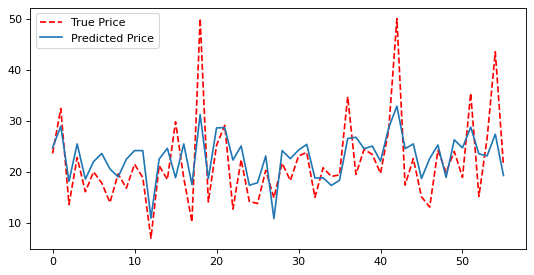

In [14]:
plt.figure(figsize=(8, 4), dpi=80)
plt.plot(y_test[:56], 'r--', preds[:56])
plt.legend(['True Price', 'Predicted Price'], loc='upper left')
plt.show()

## Compare WEEK1 weights with this Week's weight

In [16]:
week1=np.array([-0.08855942,  0.03508338,  0.01396845,  1.67216587, -5.15323435,
        6.84952512, -0.01580958, -1.01677804,  0.2662777 , -0.01378735,
       -0.59146695,  0.01471539, -0.33206519])

In [17]:
pd.DataFrame(boston.feature_names,[model.weights, week1])

,,0
-1.273796,-0.088559,CRIM
6.467136,0.035083,ZN
-1.469107,0.013968,INDUS
0.060507,1.672166,CHAS
0.004018,-5.153234,NOX
0.929855,6.849525,RM
-2.024326,-0.015810,AGE
0.202150,-1.016778,DIS
-0.150592,0.266278,RAD
-2.786779,-0.013787,TAX


### Plot The predicted price and the actual price,
As you can see the data follows the trend closely

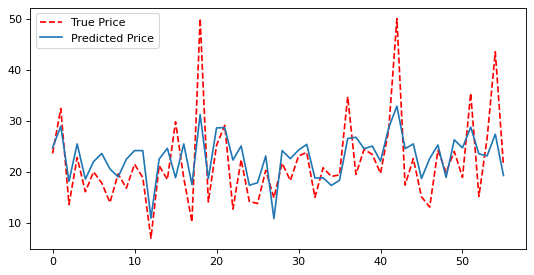

In [15]:
plt.figure(figsize=(8, 4), dpi=80)
plt.plot(y_test[:56], 'r--', preds[:56])
plt.legend(['True Price', 'Predicted Price'], loc='upper left')
plt.show()